 X-ray Image Visualization
==============================================

### What is the format of medical imaging data?
**DICOM**, an international standard for storing, exchanging, and transmitting medical images.
  * DICOM stands for **digital imaging and communications in medicine**.
  * DICOM contains
    * Image pixel data
    * A header of fixed length
    * A sequence of tagged data elements
      * The study
      * The imaging equipment
      * Patient information


### What are the challanges related to medical imaging data access and storage?
* Confidentiality: the patient information is crucial for processing and analyzing the images. However, this information as well as biometric information included in the image can uniquely identify a person, and therefore, should be kept confidential.   

* Restrictions: medical images are created, stored, accessed, and processed in the restricted environment of a hospital.

* Storage: medical images are heavy data, posing a challenge not only to their storing, but also their efficient analysis.     
* Images are typically kept in a picture archiving and communication system, referred to as PACS, which
    * archives medical images and the associated radiology meta-information

    * distributes them to departments that ordered the images.      


###  What is X-ray imaging?
X-ray imaging (also called projection radiography) is the oldest medical imaging technique. It is an example of projection medical imaging, where structures inside the body are projected on top of each other on a two dimensional plane.


### How does X-ray imaging help diagnosis?
X-ray imaging can be used to quickly examine most areas of the body for instance, to detect
  * bone fractures and breaks
  * tooth problems
  * lung problems


###  How does X-ray imaging work?
  * X rays are a type of radiation that can pass through the body.
  * The energy from the X rays is absorbed at different rates by different parts of the body.
  * A detector on the other side of the body picks up the X rays after they passed through, and turns them into an image.
    * Dense parts of the body that X-rays find it more difficult to pass through such as bone show up as clear white areas on the image
    * Softer parts that X-rays can pass through more easily, such as the heart show up as darker areas.


### How can we visualize X-ray images?
We can use [Pydicom](https://pydicom.github.io/pydicom/stable/getting_started.html), an excellent Python package for working with DICOM files.


### Let's have a look


## I. Setting
### 1. Packages

In [27]:
# Import packages
import os, sys, shutil, warnings, random, glob, pylab, numpy as np, pandas as pd, time, datetime
from tqdm import tqdm
from functools import partial
from collections import defaultdict
# packages for visualization
import pydicom, cv2, seaborn as sns, matplotlib.pyplot as plt
from matplotlib import patches
from PIL import Image
from imgaug import augmenters as iaa

# packages for model
import tensorflow as tf, keras
from keras.callbacks import EarlyStopping
from keras.backend.tensorflow_backend import set_session
from keras.models import load_model
from sklearn.model_selection import KFold, train_test_split

In [10]:
#### Package settings

# Display up to 50 columns of a pandas dataframe
pd.set_option('display.max_columns',50)
# ignore warnings
warnings.filterwarnings("ignore")

#### 2. Directory  

In [11]:
os.getcwd()

'/home/ubuntu/healthcare/pneumonia_lungfish/ocean_assets/notebooks'

In [32]:
# The home directory of this project
root_DIR = '/home/ubuntu/healthcare/pneumonia_lungfish'
# Ocean asset directories
# Image data
assets_image_data =('/home/ubuntu/healthcare/pneumonia_lungfish/ocean_assets/image_data/')
# Meta data (dataframe and array data)
assets_meta_data =('/home/ubuntu/healthcare/pneumonia_lungfish/ocean_assets/meta_data/')
# Visualization 
visual_DIR =('/home/ubuntu/healthcare/pneumonia_lungfish/ocean_assets_visualization/')


# Sample data
sample_image=('/home/ubuntu/healthcare/pneumonia_lungfish/ocean_assets/image_data/sample_image/')
# Sample image data directories for training using 
sample_train = ('/home/ubuntu/healthcare/pneumonia_lungfish/ocean_assets/image_data/sample_image/sample_train/')
sample_validate = ('/home/ubuntu/healthcare/pneumonia_lungfish/ocean_assets/image_data/sample_image/sample_validate/')
sample_test= ('/home/ubuntu/healthcare/pneumonia_lungfish/ocean_assets/image_data/sample_image/sample_test/')

# Sample meta data (dataframe and array data)
sample_meta = ('/home/ubuntu/healthcare/pneumonia_lungfish/ocean_assets/meta_data/sample_meta/')
# Sample visualization 
sample_visual=('/home/ubuntu/healthcare/pneumonia_lungfish/ocean_assets/visualization/sample_visual/')

#sample_dirs = ['sample_train','sample_validate','sample_test']
#for DIR in sample_dirs:
    #os.mkdir(os.path.join(sample_image,DIR))  


print(assets_image_data )
print(assets_meta_data)
print(visual_DIR)
print(sample_image)
print(sample_train)
print(sample_validate)
print(sample_test)
print(sample_meta)
print(sample_visual)
    

/home/ubuntu/healthcare/pneumonia_lungfish/ocean_assets/image_data/
/home/ubuntu/healthcare/pneumonia_lungfish/ocean_assets/meta_data/
/home/ubuntu/healthcare/pneumonia_lungfish/ocean_assets_visualization/
/home/ubuntu/healthcare/pneumonia_lungfish/ocean_assets/image_data/sample_image/
/home/ubuntu/healthcare/pneumonia_lungfish/ocean_assets/image_data/sample_image/sample_train/
/home/ubuntu/healthcare/pneumonia_lungfish/ocean_assets/image_data/sample_image/sample_validate/
/home/ubuntu/healthcare/pneumonia_lungfish/ocean_assets/image_data/sample_image/sample_test/
/home/ubuntu/healthcare/pneumonia_lungfish/ocean_assets/meta_data/sample_meta/
/home/ubuntu/healthcare/pneumonia_lungfish/ocean_assets/visualization/sample_visual/


In [31]:
# full data: includes all images 
full_image=('/home/ubuntu/healthcare/pneumonia_lungfish/ocean_assets/image_data/full_image/')
# full image data directories for training using 
full_train = ('/home/ubuntu/healthcare/pneumonia_lungfish/ocean_assets/image_data/full_image/full_train/')
full_validate = ('/home/ubuntu/healthcare/pneumonia_lungfish/ocean_assets/image_data/full_image/full_validate/')
full_test= ('/home/ubuntu/healthcare/pneumonia_lungfish/ocean_assets/image_data/full_image/full_test/')

# full meta data (dataframe and array data)
full_meta = ('/home/ubuntu/healthcare/pneumonia_lungfish/ocean_assets/meta_data/full_meta/')
# full visualization 
full_visual=('/home/ubuntu/healthcare/pneumonia_lungfish/ocean_assets/visualization/full_visual/')

#full_dirs = ['full_train','full_validate','full_test']
#for DIR in full_dirs:
    #os.mkdir(os.path.join(full_image,DIR))  


print(full_image)
print(full_train)
print(full_validate)
print(full_test)
print(full_meta)
print(full_visual)
    

/home/ubuntu/healthcare/pneumonia_lungfish/ocean_assets/image_data/full_image/
/home/ubuntu/healthcare/pneumonia_lungfish/ocean_assets/image_data/full_image/full_train/
/home/ubuntu/healthcare/pneumonia_lungfish/ocean_assets/image_data/full_image/full_validate/
/home/ubuntu/healthcare/pneumonia_lungfish/ocean_assets/image_data/full_image/full_test/
/home/ubuntu/healthcare/pneumonia_lungfish/ocean_assets/meta_data/full_meta/
/home/ubuntu/healthcare/pneumonia_lungfish/ocean_assets/visualization/full_visual/


## II . Full Dataset


#### 1.  Tabular Data: we will use the dataframe we prepared in Notebook00 - session 3.3

In [14]:
# Read the dataframes of the full dataset
# df_all contains target, image_path, and bounding box information 
df_all= pd.read_csv(os.path.join(full_meta,'df_target_path_box.csv'))
print(df_all.head(1))

# df_target_path contains target and image_path
df_target_path = pd.read_csv(os.path.join(full_meta,'df_target_path.csv'))
df_target_path.count()

                              patientId  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6       0   

                                          image_path   x   y  width  height  
0  /home/ubuntu/healthcare/pneumonia_lungfish/src... NaN NaN    NaN     NaN  


patientId     26684
Target        26684
image_path    26684
dtype: int64

#### 2.Meta Data from DICOM images

In [15]:
def parse_dcm_metadata(dcm):
    '''author kaggle/jtlowery'''
    unpacked_data = {}
    group_elem_to_keywords = {}
    # iterating here to force conversion from lazy RawDataElement to DataElement
    for d in dcm:
        pass
    # keys are pydicom.tag.BaseTag, values are pydicom.dataelem.DataElement
    for tag, elem in dcm.items():
        tag_group = tag.group
        tag_elem = tag.elem
        keyword = elem.keyword
        group_elem_to_keywords[(tag_group, tag_elem)] = keyword
        value = elem.value
        unpacked_data[keyword] = value
    return unpacked_data, group_elem_to_keywords


In [16]:
# A function to read dcm meta data into a dataframe,
def read_dcm_meta(image_directory,save_csv_dir):
    image_fps = []
    for (dirpath, dirnames, filenames) in os.walk(image_directory):
        #print(filenames)
        image_fps += [os.path.join(dirpath, file) for file in filenames if file.endswith(".dcm")]
    print(len(image_fps),'.dcm files were found in',image_directory)

    dcms = [pydicom.read_file(x, stop_before_pixels=True) for x in image_fps]

    meta, tag_to_key = zip(*[parse_dcm_metadata(x) for x in dcms])

    df_dcm = pd.DataFrame.from_records(data=meta)
    print(df_dcm.head(1))
    filename= "df_dcm_" + str(len(image_fps)) + "sample.csv"
    df_dcm.to_csv(os.path.join(save_csv_dir,filename),index=False)
    print(filename, '.csv file is saved in',save_csv_dir)
    return df_dcm

In [17]:
df_dcm = read_dcm_meta(full_image,full_meta)

26684 .dcm files were found in /home/ubuntu/healthcare/pneumonia_lungfish/ocean_assets/image_data/full_image/
  AccessionNumber  BitsAllocated  BitsStored BodyPartExamined  Columns  \
0                              8           8            CHEST     1024   

  ConversionType  HighBit  InstanceNumber LossyImageCompression  \
0            WSD        7               1                    01   

  LossyImageCompressionMethod Modality PatientAge PatientBirthDate  \
0                 ISO_10918_1       CR         74                    

                              PatientID                           PatientName  \
0  f2653d69-8eb5-425e-be65-b9b5409aa310  f2653d69-8eb5-425e-be65-b9b5409aa310   

  PatientOrientation PatientSex PhotometricInterpretation  \
0                             M               MONOCHROME2   

   PixelRepresentation    PixelSpacing ReferringPhysicianName  Rows  \
0                    0  [0.168, 0.168]                         1024   

                 SOPClassUID  \
0  1

#### 3. Merge meta data with tabular data 

In [18]:
def merge_dcm_tabular(df_dcm,df_all,merge_file_name,save_csv_dir):
    df_dcm_all= pd.merge(df_dcm,df_all,how='left', left_on='PatientID', right_on='patientId')
    print(len(df_dcm['PatientID'].unique()),'samples;',df_dcm_all.shape[0],'rows')
    filename= str(merge_file_name) + ".csv"
    df_dcm_all.to_csv(os.path.join(save_csv_dir,filename),index=False)
    return df_dcm_all

#### with box information 

In [19]:
df_dcm_box = merge_dcm_tabular(df_dcm,df_all,'df_dcm_target_path_box',full_meta)
df_dcm_box.head(1)

26684 samples; 30227 rows


AccessionNumber  BitsAllocated  BitsStored BodyPartExamined  Columns  \
0                              8           8            CHEST     1024   

  ConversionType  HighBit  InstanceNumber LossyImageCompression  \
0            WSD        7               1                    01   

  LossyImageCompressionMethod Modality PatientAge PatientBirthDate  \
0                 ISO_10918_1       CR         74                    

                              PatientID                           PatientName  \
0  f2653d69-8eb5-425e-be65-b9b5409aa310  f2653d69-8eb5-425e-be65-b9b5409aa310   

  PatientOrientation PatientSex PhotometricInterpretation  \
0                             M               MONOCHROME2   

   PixelRepresentation    PixelSpacing ReferringPhysicianName  Rows  \
0                    0  [0.168, 0.168]                         1024   

                 SOPClassUID  \
0  1.2.840.10008.5.1.4.1.1.7   

                                      SOPInstanceUID  SamplesPerPixel  \
0  1.2.276.0.7230010.3.1.4.8323329.19307.15178744...                1   

  SeriesDescription                                  SeriesInstanceUID  \
0          view: PA  1.2.276.0.7230010.3.1.3.8323329.19307.15178744...   

   SeriesNumber SpecificCharacterSet StudyDate StudyID  \
0             1           ISO_IR 100  19010101           

                                    StudyInstanceUID  StudyTime ViewPosition  \
0  1.2.276.0.7230010.3.1.2.8323329.19307.15178744...  000000.00           PA   

                              patientId  Target  \
0  f2653d69-8eb5-425e-be65-b9b5409aa310       0   

                                          image_path   x   y  width  height  
0  /home/ubuntu/healthcare/pneumonia_lungfish/src... NaN NaN    NaN     NaN

#### without box information, no replicates

In [20]:
df_dcm_target=merge_dcm_tabular(df_dcm,df_target_path,'df_dcm_target_path',full_meta)

26684 samples; 26684 rows


#### Files in the full dataset

* New
  * df_dcm_merge_all.csv
  * df_dcm_merge_target_path.csv
  * df_dcm_25683sample.csv


* Previously generated files
  * df_target_path_box.csv
  * df_target_path.csv

#### 4. View DICOM images in the full dataset

In [21]:
df_dcm_box = pd.read_csv(os.path.join(full_meta,'df_dcm_target_path_box.csv'))

df =df_dcm_box
df.head(1)

AccessionNumber  BitsAllocated  BitsStored BodyPartExamined  Columns  \
0              NaN              8           8            CHEST     1024   

  ConversionType  HighBit  InstanceNumber  LossyImageCompression  \
0            WSD        7               1                      1   

  LossyImageCompressionMethod Modality  PatientAge  PatientBirthDate  \
0                 ISO_10918_1       CR          74               NaN   

                              PatientID                           PatientName  \
0  f2653d69-8eb5-425e-be65-b9b5409aa310  f2653d69-8eb5-425e-be65-b9b5409aa310   

   PatientOrientation PatientSex PhotometricInterpretation  \
0                 NaN          M               MONOCHROME2   

   PixelRepresentation        PixelSpacing  ReferringPhysicianName  Rows  \
0                    0  ['0.168', '0.168']                     NaN  1024   

                 SOPClassUID  \
0  1.2.840.10008.5.1.4.1.1.7   

                                      SOPInstanceUID  SamplesPerPixel  \
0  1.2.276.0.7230010.3.1.4.8323329.19307.15178744...                1   

  SeriesDescription                                  SeriesInstanceUID  \
0          view: PA  1.2.276.0.7230010.3.1.3.8323329.19307.15178744...   

   SeriesNumber SpecificCharacterSet  StudyDate  StudyID  \
0             1           ISO_IR 100   19010101      NaN   

                                    StudyInstanceUID  StudyTime ViewPosition  \
0  1.2.276.0.7230010.3.1.2.8323329.19307.15178744...        0.0           PA   

                              patientId  Target  \
0  f2653d69-8eb5-425e-be65-b9b5409aa310       0   

                                          image_path   x   y  width  height  
0  /home/ubuntu/healthcare/pneumonia_lungfish/src... NaN NaN    NaN     NaN

In [22]:
# a function to read a dcm using image id in the full dataset 
def read_dcm_image(patient_id):
    '''
    look for and read a dcm image in assets_image_full subdirectories, including
    full_train
    full_validate
    full_test
    
    '''
    train_fp = os.path.join(full_train+'{}.dcm').format(patient_id)
    validate_fp = os.path.join(full_validate+'{}.dcm').format(patient_id)
    test_fp = os.path.join(full_test+'{}.dcm').format(patient_id)   
    if os.path.exists(train_fp):
        dcm = pydicom.read_file(train_fp)
    elif os.path.exists(validate_fp):
        dcm = pydicom.read_file(validate_fp)
    else:
        dcm = pydicom.read_file(test_fp)
    return dcm 


#### Add bbox_counts column

In [23]:
# check every row with Target==1 has a bounding box
assert sum(df['Target']==1) == sum(~df['x'].isnull())

bbox_counts = df.groupby('patientId')['Target'].sum()
df.index = df.patientId
df['bbox_counts'] = bbox_counts
df = df.reset_index(drop=True)
#print(df.head(2))
df.to_csv(os.path.join(full_meta,'df_dcm_merge_box_bbcounts_full.csv'))

#### Build a dictionary of bbox_arrays (bounding boxes arrays)

In [24]:
# Build a dictionary of bbox_arrays (bounding boxes arrays)
def build_bbox_arrays_by_id(df):    
    '''
    author: kaggle/jtlowery    
    '''   
    from functools import partial
    from collections import defaultdict
    
    zeros_array_constructor = partial(np.zeros, shape=(1024,1024), dtype=np.uint8)
    arrays = defaultdict(zeros_array_constructor)
    for idx, row in df.iterrows():
        patient_id = row['patientId']
        x, y = int(row['x']), int(row['y'])
        width, height = int(row['width']), int(row['height'])
        array = arrays[patient_id]
        array[y: y + height, x: x + width] += 1
    return arrays

#### Prepare feature groups 

In [25]:
groups_to_ids = {
    'pa': set(df['patientId'][df['ViewPosition']=='PA'].dropna().unique()),
    'ap': set(df['patientId'][df['ViewPosition']=='AP'].dropna().unique()),
    
    'bbox_4': set(df['patientId'][df['bbox_counts']==4].dropna().unique()),
    'bbox_3': set(df['patientId'][df['bbox_counts']==3].dropna().unique()),
    'bbox_2': set(df['patientId'][df['bbox_counts']==2].dropna().unique()),
    'bbox_1': set(df['patientId'][df['bbox_counts']==1].dropna().unique()),
    
    'f': set(df['patientId'][df['PatientSex']=='F'].dropna().unique()),
    'm': set(df['patientId'][df['PatientSex']=='M'].dropna().unique()),
    
    'age_above_60': set(df['patientId'][df['PatientAge'] > 60].dropna().unique()),
    'age_40_to_60': set(df['patientId'][(df['PatientAge'] <= 60) & (df['PatientAge'] >= 40)].dropna().unique()),
    'age_below_40': set(df['patientId'][df['PatientAge'] < 40].dropna().unique()),
}


#### Prepare bounding box arrays by group

In [28]:
#key is patientId, value is bbox_arrays
full_bbox_arrays = build_bbox_arrays_by_id(df[df['Target']==1])

outfile = os.path.join(full_meta,'dict_of_arrays_bbox_full.npz')
np.savez(outfile, **full_bbox_arrays)

#npzfile = np.load(outfile)
#print('npzfile.files: {}'.format(npzfile.files))
#print('npzfile["1"]: {}'.format(npzfile["1"]))

# construct arrays representing 'density' of bounding boxes by summing the arrays
zeros_array_constructor = partial(np.zeros, shape=(1024,1024), dtype=np.uint32)
groups_to_bbox_sums = defaultdict(zeros_array_constructor)
groups_to_bbox_sums['all'] = np.zeros(shape=(1024,1024), dtype=np.uint32)
# 
for patient_id, bbox_array in full_bbox_arrays.items():
    # add to all group
    groups_to_bbox_sums['all'] += bbox_array

    # add to each other group where id is in that group's id set
    for group, id_set in groups_to_ids.items(): ######## 
        if patient_id in id_set:
            groups_to_bbox_sums[group] += bbox_array

In [29]:
def plot_density(array, ax, title, n_countour_levels=3):
    contour_set = ax.contour(
        np.arange(0, 1024, 1), 
        np.arange(1024, 0, -1),
        array, 
        n_countour_levels, 
        linewidths=.5,
        colors='black'
    )
    plt.clabel(contour_set, inline=True, fontsize=10, fmt='%.0f')
    im = ax.imshow(
        array, 
        extent=[0, 1024, 0, 1024], 
        origin='upper', 
        cmap='viridis', 
        alpha=.8,
        
    )
    plt.colorbar(im, ax=ax)

    ax.set_axis_off()
    ax.set_title(title)

    return im

#### All groups

In [33]:
fig, axes = plt.subplots(1, 1, figsize=(14, 6), sharex=True)
_ = plot_density(groups_to_bbox_sums['all'], axes, 'Density.Plots.Patients.Sampleset')
figname = '{}{:%Y%m%dT%H%M%S}.png'.format(os.path.join(full_visual,'Density.Plots.AllGroup.Patients.25683'), datetime.datetime.now())
plt.savefig(figname, figdpi = 600)

#### By view position

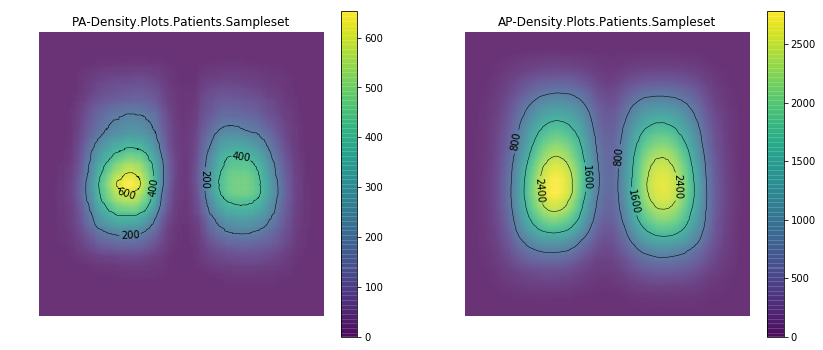

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)
_ = plot_density(groups_to_bbox_sums['pa'], axes[0], 'PA-Density.Plots.Patients.Sampleset')
_ = plot_density(groups_to_bbox_sums['ap'], axes[1], 'AP-Density.Plots.Patients.Sampleset')

figname = '{}{:%Y%m%dT%H%M%S}.png'.format(os.path.join(full_visual,'Density.Plots.Position.Patients.25683Samples_'), datetime.datetime.now())
plt.savefig(figname, figdpi = 600)



#### By gender

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

_ = plot_density(groups_to_bbox_sums['f'], axes[0], 'Female-Density.Plots.Patients.Sampleset', n_countour_levels=3)
_ = plot_density(groups_to_bbox_sums['m'], axes[1], 'Male-Density.Plots.Patients.Sampleset', n_countour_levels=3)

figname = '{}{:%Y%m%dT%H%M%S}.png'.format(os.path.join(full_visual,'Density.Plots.Gender.Patients.25683Samples_'), datetime.datetime.now())
plt.savefig(figname, figdpi = 600)


#### By number of boxes

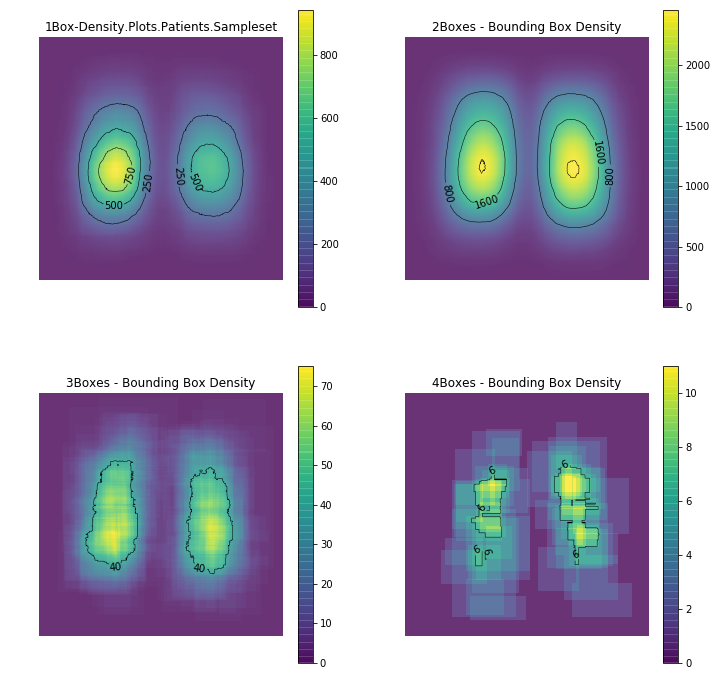

In [37]:
fig, axes = plt.subplots(2,2, figsize=(12, 12))

_ = plot_density(groups_to_bbox_sums['bbox_1'], axes[0, 0], '1Box-Density.Plots.Patients.Sampleset', n_countour_levels=3)
_ = plot_density(groups_to_bbox_sums['bbox_2'], axes[0, 1], '2Boxes - Bounding Box Density', n_countour_levels=3)
_ = plot_density(groups_to_bbox_sums['bbox_3'], axes[1, 0], '3Boxes - Bounding Box Density', n_countour_levels=1)
_ = plot_density(groups_to_bbox_sums['bbox_4'], axes[1, 1], '4Boxes - Bounding Box Density', n_countour_levels=1)


figname = '{}{:%Y%m%dT%H%M%S}.png'.format(os.path.join(full_visual,'Density.Plots.Instances.Patients.25683Samples_'), datetime.datetime.now())
plt.savefig(figname, figdpi = 600)


#### By age

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

_ = plot_density(groups_to_bbox_sums['age_above_60'], axes[0], 'PatientAge > 60', n_countour_levels=3)
_ = plot_density(groups_to_bbox_sums['age_40_to_60'], axes[1], '40 <= PatientAge <= 60', n_countour_levels=3)
_ = plot_density(groups_to_bbox_sums['age_below_40'], axes[2], 'PatientAge < 40', n_countour_levels=3)


figname = '{}{:%Y%m%dT%H%M%S}.png'.format(os.path.join(full_visual,'Density.Plots.Age.Patients.25683Samples_'), datetime.datetime.now())
plt.savefig(figname, figdpi = 600)

#### Number of positive (Target =1) and negative (Target =0) samples

In [39]:
# Count by colname
def plot_by_target(df,colname,save_plot_dir):
    import seaborn as sns, matplotlib.pyplot as plt
    df=df.drop_duplicates()
    number = df[colname].value_counts().values
    number = [str(x) for x in number.tolist()]
    number = ['n: ' + i for i in number]
    ax = sns.countplot(x=colname,  data=df)
    
    pos = range(len(number))
    for tick,label in zip(pos,ax.get_xticklabels()):
        ax.text(pos[tick], + 0.1, number[tick], horizontalalignment='center', size='small', color='w', weight='semibold')
    
    
    fig = ax.get_figure()
    
    #save plot
    n_images =df['image_path'].nunique()
    name= 'dcm_summary_by_label_'+str(n_images)+'samples'
    figname = '{}{:%Y%m%dT%H%M}.png'.format(os.path.join(save_plot_dir,name), datetime.datetime.now())
    fig.savefig(figname, figdpi = 600)



In [40]:
# Full dataset: dataframe containing unique patientIDs
plot_by_target(df_target_path,'Target',full_visual)

## III. Sample dataset 

#### 1.  Tabular Data: we will use the dataframe we prepared in Notebook00 - Session 4.2 and Session 4.4

In [41]:
# Read the dataframes of the sample dataset
# df_sample contains target, image_path, and bounding box information 
df_sample= pd.read_csv(os.path.join(sample_meta,'df_target_path_box_1000samples.csv'))
print(df_sample.head(1))

# df_target_path contains target and image_path
df_sample_target_path = pd.read_csv(os.path.join(sample_meta,'df_target_path_1000sample.csv'))
df_sample_target_path.head(1)

                                          image_path  \
0  /home/ubuntu/healthcare/pneumonia_lungfish/src...   

                                  image_dcm  \
0  be89e82c-0f08-4660-82de-c2fe903df1c0.dcm   

                              patientId  Target   x   y  width  height  
0  be89e82c-0f08-4660-82de-c2fe903df1c0       0 NaN NaN    NaN     NaN  


image_path  \
0  /home/ubuntu/healthcare/pneumonia_lungfish/src...   

                                  image_dcm  \
0  be89e82c-0f08-4660-82de-c2fe903df1c0.dcm   

                              patientId  Target  
0  be89e82c-0f08-4660-82de-c2fe903df1c0       0

#### 2.Meta Data from DICOM images

In [43]:
# a function to read a dcm using image id in the Sample dataset 
def read_dcm_image(patient_id): 
    '''
    look for and read a dcm image in assets_image_sample subdirectories, including
    sample_train
    sample_validate
    sample_test
    
    '''
    train_fp = os.path.join(sample_train+'{}.dcm').format(patient_id)
    validate_fp = os.path.join(sample_validate+'{}.dcm').format(patient_id)
    test_fp = os.path.join(sample_test+'{}.dcm').format(patient_id)   
    if os.path.exists(train_fp):
        dcm = pydicom.read_file(train_fp)
    elif os.path.exists(validate_fp):
        dcm = pydicom.read_file(validate_fp)
    else:
        dcm = pydicom.read_file(test_fp)
    return dcm 


In [44]:
# A function to read dcm meta data into a dataframe
def read_dcm_meta(image_directory):
    image_fps = []
    for (dirpath, dirnames, filenames) in os.walk(image_directory):
        #print(filenames)
        image_fps += [os.path.join(dirpath, file) for file in filenames if file.endswith(".dcm")]
    print(len(image_fps),'.dcm files were found in',image_directory)

    dcms = [pydicom.read_file(x, stop_before_pixels=True) for x in image_fps]

    meta, tag_to_key = zip(*[parse_dcm_metadata(x) for x in dcms])

    df_dcm = pd.DataFrame.from_records(data=meta)
    print(df_dcm.head(1))
    filename= "df_dcm_" + str(len(image_fps)) + "sample.csv"
    df_dcm.to_csv(os.path.join(sample_meta,filename),index=False)
    return df_dcm

In [48]:
df_dcm_sample=read_dcm_meta(sample_image)

1000 .dcm files were found in /home/ubuntu/healthcare/pneumonia_lungfish/ocean_assets/image_data/sample_image/
  AccessionNumber  BitsAllocated  BitsStored BodyPartExamined  Columns  \
0                              8           8            CHEST     1024   

  ConversionType  HighBit  InstanceNumber LossyImageCompression  \
0            WSD        7               1                    01   

  LossyImageCompressionMethod Modality PatientAge PatientBirthDate  \
0                 ISO_10918_1       CR         51                    

                              PatientID                           PatientName  \
0  b56db2b9-4296-479b-aee2-63ac4d4b4814  b56db2b9-4296-479b-aee2-63ac4d4b4814   

  PatientOrientation PatientSex PhotometricInterpretation  \
0                             F               MONOCHROME2   

   PixelRepresentation    PixelSpacing ReferringPhysicianName  Rows  \
0                    0  [0.171, 0.171]                         1024   

                 SOPClassUID  \
0  

#### 3. Merge meta data with tabular data 

#### with box information 

In [49]:
df_sample_dcm_box = merge_dcm_tabular(df_sample_dcm,df_sample,'df_dcm_merge_box_1000samples',save_csv_dir=sample_meta)
df_sample_dcm_box.head(2)

1000 samples; 1133 rows


AccessionNumber  BitsAllocated  BitsStored BodyPartExamined  Columns  \
0                              8           8            CHEST     1024   
1                              8           8            CHEST     1024   

  ConversionType  HighBit  InstanceNumber LossyImageCompression  \
0            WSD        7               1                    01   
1            WSD        7               1                    01   

  LossyImageCompressionMethod Modality PatientAge PatientBirthDate  \
0                 ISO_10918_1       CR         51                    
1                 ISO_10918_1       CR         46                    

                              PatientID                           PatientName  \
0  b56db2b9-4296-479b-aee2-63ac4d4b4814  b56db2b9-4296-479b-aee2-63ac4d4b4814   
1  5c28edea-7b30-4306-809a-7037c9a8d7b0  5c28edea-7b30-4306-809a-7037c9a8d7b0   

  PatientOrientation PatientSex PhotometricInterpretation  \
0                             F               MONOCHROME2   
1                             M               MONOCHROME2   

   PixelRepresentation                                PixelSpacing  \
0                    0                              [0.171, 0.171]   
1                    0  [0.14300000000000002, 0.14300000000000002]   

  ReferringPhysicianName  Rows                SOPClassUID  \
0                         1024  1.2.840.10008.5.1.4.1.1.7   
1                         1024  1.2.840.10008.5.1.4.1.1.7   

                                      SOPInstanceUID  SamplesPerPixel  \
0  1.2.276.0.7230010.3.1.4.8323329.10011.15178743...                1   
1  1.2.276.0.7230010.3.1.4.8323329.11239.15178743...                1   

  SeriesDescription                                  SeriesInstanceUID  \
0          view: AP  1.2.276.0.7230010.3.1.3.8323329.10011.15178743...   
1          view: PA  1.2.276.0.7230010.3.1.3.8323329.11239.15178743...   

   SeriesNumber SpecificCharacterSet StudyDate StudyID  \
0             1           ISO_IR 100  19010101           
1             1           ISO_IR 100  19010101           

                                    StudyInstanceUID  StudyTime ViewPosition  \
0  1.2.276.0.7230010.3.1.2.8323329.10011.15178743...  000000.00           AP   
1  1.2.276.0.7230010.3.1.2.8323329.11239.15178743...  000000.00           PA   

                                          image_path  \
0  /home/ubuntu/healthcare/pneumonia_lungfish/src...   
1  /home/ubuntu/healthcare/pneumonia_lungfish/src...   

                                  image_dcm  \
0  b56db2b9-4296-479b-aee2-63ac4d4b4814.dcm   
1  5c28edea-7b30-4306-809a-7037c9a8d7b0.dcm   

                              patientId  Target   x   y  width  height  
0  b56db2b9-4296-479b-aee2-63ac4d4b4814       0 NaN NaN    NaN     NaN  
1  5c28edea-7b30-4306-809a-7037c9a8d7b0       0 NaN NaN    NaN     NaN

#### without box information, no replicates

In [50]:
df_sample_dcm_target_sample=merge_dcm_tabular(df_dcm_sample,df_target_path,'df_dcm_merge_target_path_1000samples',save_csv_dir=sample_meta)

1000 samples; 1000 rows


#### 4. Select and view DICOM images in the sample dataset


In [51]:
df_sample_dcm_box = pd.read_csv(os.path.join(sample_meta,'df_dcm_merge_box_1000samples.csv'))
df_sample_dcm_box.head(1)

AccessionNumber  BitsAllocated  BitsStored BodyPartExamined  Columns  \
0              NaN              8           8            CHEST     1024   

  ConversionType  HighBit  InstanceNumber  LossyImageCompression  \
0            WSD        7               1                      1   

  LossyImageCompressionMethod Modality  PatientAge  PatientBirthDate  \
0                 ISO_10918_1       CR          51               NaN   

                              PatientID                           PatientName  \
0  b56db2b9-4296-479b-aee2-63ac4d4b4814  b56db2b9-4296-479b-aee2-63ac4d4b4814   

   PatientOrientation PatientSex PhotometricInterpretation  \
0                 NaN          F               MONOCHROME2   

   PixelRepresentation        PixelSpacing  ReferringPhysicianName  Rows  \
0                    0  ['0.171', '0.171']                     NaN  1024   

                 SOPClassUID  \
0  1.2.840.10008.5.1.4.1.1.7   

                                      SOPInstanceUID  SamplesPerPixel  \
0  1.2.276.0.7230010.3.1.4.8323329.10011.15178743...                1   

  SeriesDescription                                  SeriesInstanceUID  \
0          view: AP  1.2.276.0.7230010.3.1.3.8323329.10011.15178743...   

   SeriesNumber SpecificCharacterSet  StudyDate  StudyID  \
0             1           ISO_IR 100   19010101      NaN   

                                    StudyInstanceUID  StudyTime ViewPosition  \
0  1.2.276.0.7230010.3.1.2.8323329.10011.15178743...        0.0           AP   

                                          image_path  \
0  /home/ubuntu/healthcare/pneumonia_lungfish/src...   

                                  image_dcm  \
0  b56db2b9-4296-479b-aee2-63ac4d4b4814.dcm   

                              patientId  Target   x   y  width  height  
0  b56db2b9-4296-479b-aee2-63ac4d4b4814       0 NaN NaN    NaN     NaN

In [116]:
# a function to display DICOM image in color
def color_plot_grid(save_plot_dir, df, pid_sample_list, nrows, ncols, draw_bbox=True, ax_off=False):    
    ''' 
    plt.imshow(img, cmap=None)
    '''
    fig = plt.figure(figsize=(16, 12))
    for i in range(nrows * ncols):
        patient_id = pid_sample_list[i]
        img = read_dcm_image(patient_id).pixel_array
        ax = fig.add_subplot(nrows, ncols, i + 1)
        plt.imshow(img, cmap=None)
        ax.set_title(patient_id)
        if ax_off: 
            ax.set_axis_off()
        if draw_bbox:
            bbox_rows = df[df['PatientID'] == patient_id]
            for _, row in bbox_rows.iterrows():
                x, y = row['x'], row['y']
                width, height = row['width'], row['height']
                bbox = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='black', facecolor='none')
                ax.add_patch(bbox)
    # number of images to display            
    n_images= int(nrows*ncols)            
    print(n_images, 'samples are displayed')
    # plot images
    plt.tight_layout()
    plt.subplots_adjust(wspace=.05, hspace=.05)
    #save figure
    name= 'dcm_visualization_'+str(n_images)+'samples_color'
    figname = '{}{:%Y%m%dT%H%M%S}.png'.format(os.path.join(save_plot_dir,name), datetime.datetime.now())
    fig.savefig(figname, figdpi = 600)
      
    return fig


In [117]:
# a function to display DICOM image in gray
def gray_plot_grid(save_plot_dir, df, pid_sample_list, nrows, ncols, draw_bbox=True, ax_off=False):    
    ''' 
    plt.imshow(img, cmap='gray')
    '''
    fig = plt.figure(figsize=(16, 12))
    for i in range(nrows * ncols):
        patient_id = pid_sample_list[i]
        img = read_dcm_image(patient_id).pixel_array
        ax = fig.add_subplot(nrows, ncols, i + 1)
        plt.imshow(img, cmap='gray')
        ax.set_title(patient_id)
        if ax_off: 
            ax.set_axis_off()
        if draw_bbox:
            bbox_rows = df[df['PatientID'] == patient_id]
            for _, row in bbox_rows.iterrows():
                x, y = row['x'], row['y']
                width, height = row['width'], row['height']
                bbox = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='black', facecolor='none')
                ax.add_patch(bbox)
    # number of images to display            
    n_images= int(nrows*ncols)            
    print(n_images, 'samples are displayed')
    # plot images
    plt.tight_layout()
    plt.subplots_adjust(wspace=.05, hspace=.05)
    #save figure
    name= 'dcm_visualization_'+str(n_images)+'samples_gray'
    figname = '{}{:%Y%m%dT%H%M%S}.png'.format(os.path.join(save_plot_dir,name), datetime.datetime.now())
    fig.savefig(figname, figdpi = 600)
      
    return fig


#### Let's select some patients by age

In [91]:
# a function to filter patietns by age: select minAge=<PatientAge<=maxAge
def select_patient_age(df,minAge,maxAge,sample_size):
    df= df.reindex()
    df['PatientAge'] = df['PatientAge'].astype(int)
    df_age=df[df['PatientAge'].between(int(minAge), int(maxAge), inclusive=True)]
    
    list_ids =[]
    if df_age['PatientID'].nunique() ==0:
        print('0 samples were found')
    elif df_age['PatientID'].nunique() < int(sample_size):
        max_size = df_age['PatientID'].nunique()
        list_ids = df_age['PatientID'].sample(int(max_size)).tolist()
        print(df_age['PatientID'].nunique(), 'samples were found in the database')
        print(sample_size,'samples are randomly selected')
    else:
        list_ids = df_age['PatientID'].sample(int(sample_size)).tolist()
        print(df_age['PatientID'].nunique(), 'samples were found in the database') 
        print(sample_size,'samples are randomly selected')
    return list_ids
    




In [93]:
# select patients who are under 16 years old
list_ids =select_patient_age(df_sample_dcm_box,0,16,6)
_ = color_plot_grid(sample_visual,df, list_ids, nrows=2, ncols=3)

38 samples were found in the database
6 samples are randomly selected
6 samples are displayed


In [94]:
_=gray_plot_grid(sample_visual,df_sample_dcm_box, list_ids, nrows=2, ncols=3)

6 samples are displayed


#### Let's select some patients by gender

In [95]:
## a function to filter patietns by gender
def select_patient_gender(df,gender,sample_size):
    '''
    gender: 'F' or 'M'
    '''
    df= df.reindex()
    df_gender=df[df['PatientSex']==str(gender)]

    list_ids =[]
    if df_gender['PatientID'].nunique() ==0:
        print('0 samples were found')
    elif df_gender['PatientID'].nunique() < int(sample_size):
        max_size = df_gender['PatientID'].nunique()
        list_ids = df_gender['PatientID'].sample(int(max_size)).tolist()
        print(df_gender['PatientID'].nunique(), 'samples were found in the database')
        print(sample_size,'samples are randomly selected')
    else:
        list_ids = df_gender['PatientID'].sample(int(sample_size)).tolist()
        print(df_gender['PatientID'].nunique(), 'samples were found in the database') 
        print(sample_size,'samples are randomly selected')
    return list_ids

In [119]:
list_ids =select_patient_gender(df_sample_dcm_box,'M',6)
_=gray_plot_grid (sample_visual,df_sample_dcm_box, list_ids, nrows=2, ncols=3)
_=color_plot_grid (sample_visual,df_sample_dcm_box, list_ids, nrows=2, ncols=3)

559 samples were found in the database
6 samples are randomly selected
6 samples are displayed
6 samples are displayed


In [121]:
## a function to filter patietns by view position
def select_patient_position(df,position,sample_size):
    '''
    position: 
    PA = posterior-anterior (ray enters back first, so back would be at the 'top' of the image)
    AP = anterior-posterior (ray enters chest first)
    this function will return a list as a filtering condition 
    '''
    df= df.reindex()
    list_ids =[]
    
    # prepare a dataframe 
    df_position=df[df['ViewPosition']==str(position)]
    if df_position['PatientID'].nunique() ==0:
        print('0 samples were found')
    elif df_position['PatientID'].nunique() < int(sample_size):
        max_size = df_position['PatientID'].nunique()
        list_ids = df_position['PatientID'].sample(int(max_size)).tolist()
        print(df_position['PatientID'].nunique(), 'samples were found in the database')
        print(sample_size,'samples are randomly selected')
    else:
        list_ids = df_position['PatientID'].sample(int(sample_size)).tolist()
        print(df_position['PatientID'].nunique(), 'samples were found in the database') 
        print(sample_size,'samples are randomly selected')
    return list_ids

426 samples were found in the database
100 samples are randomly selected
6 samples are displayed


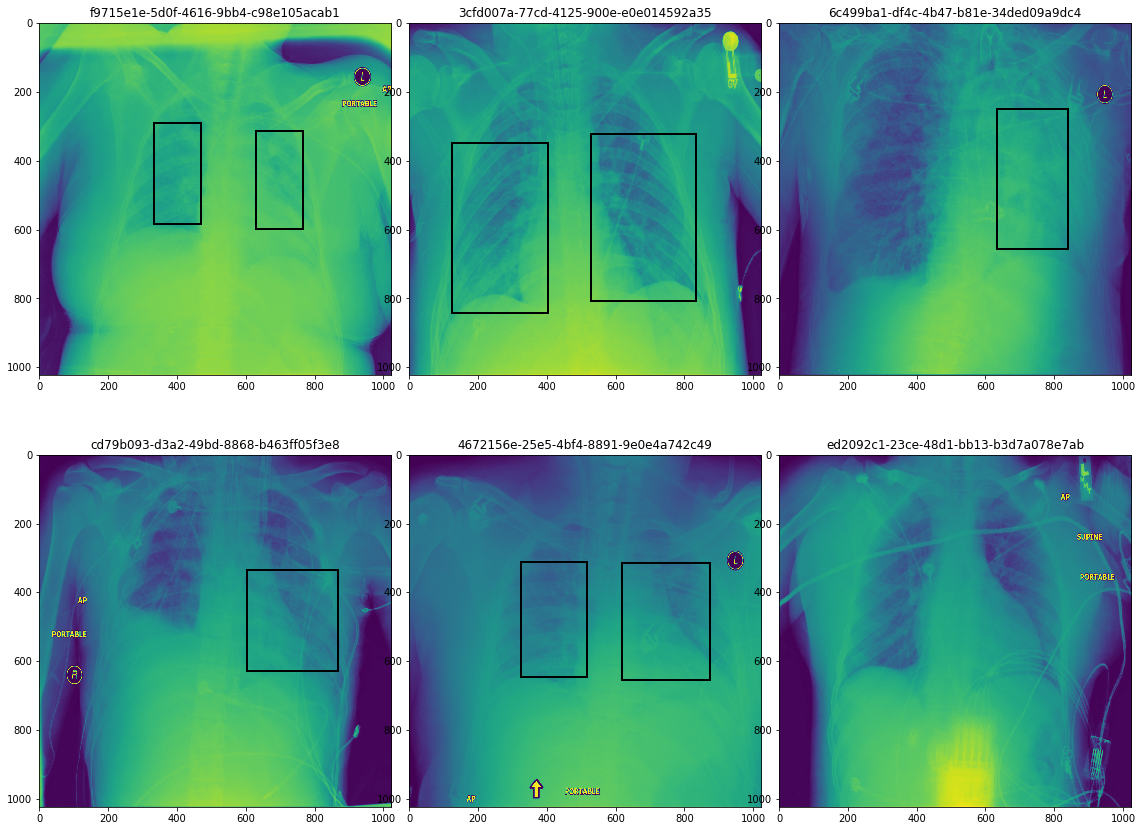

In [123]:
list_ids =select_patient_position(df_sample_dcm_box,'AP',100)
_=color_plot_grid (sample_visual,df, list_ids, nrows=2, ncols=3)

6 samples are displayed


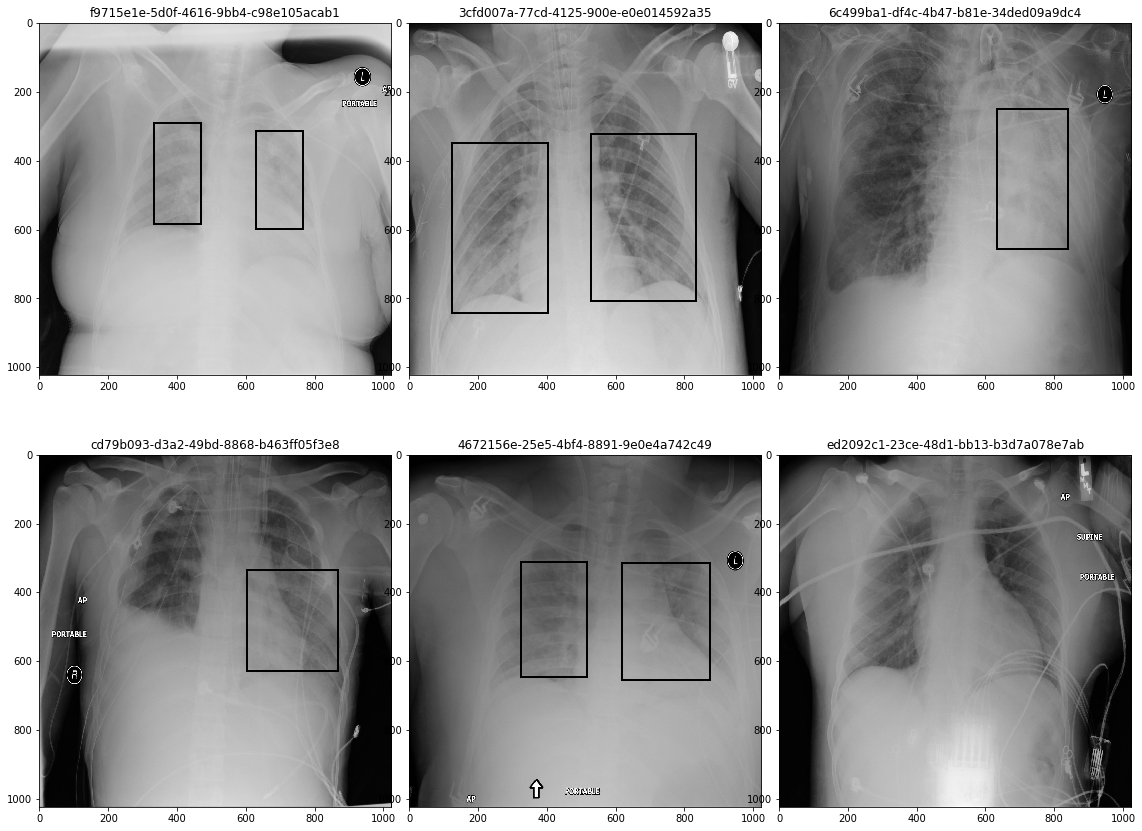

In [125]:
_=gray_plot_grid (sample_visual,df, list_ids, nrows=2, ncols=3)

#### 5. Get an overview of the dataset using box information

In [126]:
df =df_sample_dcm_box
df.head(2)

AccessionNumber  BitsAllocated  BitsStored BodyPartExamined  Columns  \
0              NaN              8           8            CHEST     1024   
1              NaN              8           8            CHEST     1024   

  ConversionType  HighBit  InstanceNumber  LossyImageCompression  \
0            WSD        7               1                      1   
1            WSD        7               1                      1   

  LossyImageCompressionMethod Modality  PatientAge  PatientBirthDate  \
0                 ISO_10918_1       CR          51               NaN   
1                 ISO_10918_1       CR          46               NaN   

                              PatientID                           PatientName  \
0  b56db2b9-4296-479b-aee2-63ac4d4b4814  b56db2b9-4296-479b-aee2-63ac4d4b4814   
1  5c28edea-7b30-4306-809a-7037c9a8d7b0  5c28edea-7b30-4306-809a-7037c9a8d7b0   

   PatientOrientation PatientSex PhotometricInterpretation  \
0                 NaN          F               MONOCHROME2   
1                 NaN          M               MONOCHROME2   

   PixelRepresentation                                    PixelSpacing  \
0                    0                              ['0.171', '0.171']   
1                    0  ['0.14300000000000002', '0.14300000000000002']   

   ReferringPhysicianName  Rows                SOPClassUID  \
0                     NaN  1024  1.2.840.10008.5.1.4.1.1.7   
1                     NaN  1024  1.2.840.10008.5.1.4.1.1.7   

                                      SOPInstanceUID  SamplesPerPixel  \
0  1.2.276.0.7230010.3.1.4.8323329.10011.15178743...                1   
1  1.2.276.0.7230010.3.1.4.8323329.11239.15178743...                1   

  SeriesDescription                                  SeriesInstanceUID  \
0          view: AP  1.2.276.0.7230010.3.1.3.8323329.10011.15178743...   
1          view: PA  1.2.276.0.7230010.3.1.3.8323329.11239.15178743...   

   SeriesNumber SpecificCharacterSet  StudyDate  StudyID  \
0             1           ISO_IR 100   19010101      NaN   
1             1           ISO_IR 100   19010101      NaN   

                                    StudyInstanceUID  StudyTime ViewPosition  \
0  1.2.276.0.7230010.3.1.2.8323329.10011.15178743...        0.0           AP   
1  1.2.276.0.7230010.3.1.2.8323329.11239.15178743...        0.0           PA   

                                          image_path  \
0  /home/ubuntu/healthcare/pneumonia_lungfish/src...   
1  /home/ubuntu/healthcare/pneumonia_lungfish/src...   

                                  image_dcm  \
0  b56db2b9-4296-479b-aee2-63ac4d4b4814.dcm   
1  5c28edea-7b30-4306-809a-7037c9a8d7b0.dcm   

                              patientId  Target   x   y  width  height  
0  b56db2b9-4296-479b-aee2-63ac4d4b4814       0 NaN NaN    NaN     NaN  
1  5c28edea-7b30-4306-809a-7037c9a8d7b0       0 NaN NaN    NaN     NaN

#### Add bbox_counts column

In [130]:

# check every row with Target==1 has a bounding box
assert sum(df['Target']==1) == sum(~df['x'].isnull())

bbox_counts = df.groupby('patientId')['Target'].sum()
df.index = df.patientId
df['bbox_counts'] = bbox_counts
df = df.reset_index(drop=True)
df.head(2)
df.to_csv(os.path.join(sample_meta,'df_dcm_merge_box_bbcounts_1000samples.csv'))

#### Build a dictionary of bbox_arrays (bounding boxes arrays)

In [131]:
#### Build a dictionary of bbox_arrays (bounding boxes arrays)
def build_bbox_arrays_by_id(df):    
    '''
    author: kaggle/jtlowery    
    '''   
    from functools import partial
    from collections import defaultdict
    
    zeros_array_constructor = partial(np.zeros, shape=(1024,1024), dtype=np.uint8)
    arrays = defaultdict(zeros_array_constructor)
    for idx, row in df.iterrows():
        patient_id = row['patientId']
        x, y = int(row['x']), int(row['y'])
        width, height = int(row['width']), int(row['height'])
        array = arrays[patient_id]
        array[y: y + height, x: x + width] += 1
    return arrays

In [132]:
#key is patientId, value is bbox_arrays
sample_bbox_arrays = build_bbox_arrays_by_id(df[df['Target']==1])

outfile = os.path.join(sample_meta,'dict_of_arrays_bbox_1000samples.npz')
np.savez(outfile, **sample_bbox_arrays)

npzfile = np.load(outfile)
#print('npzfile.files: {}'.format(npzfile.files))


In [133]:
# construct arrays representing 'density' of bounding boxes by summing the arrays
zeros_array_constructor = partial(np.zeros, shape=(1024,1024), dtype=np.uint32)
sample_groups_to_bbox_sums = defaultdict(zeros_array_constructor)
sample_groups_to_bbox_sums['all'] = np.zeros(shape=(1024,1024), dtype=np.uint32)

for patient_id, bbox_array in sample_bbox_arrays.items():
    # add to all group
    sample_groups_to_bbox_sums['all'] += bbox_array

    # add to each other group where id is in that group's id set
    for group, id_set in groups_to_ids.items():
        if patient_id in id_set:
            sample_groups_to_bbox_sums[group] += bbox_array

In [137]:
def plot_density(array, ax, title, n_countour_levels=3):
    contour_set = ax.contour(
        np.arange(0, 1024, 1), 
        np.arange(1024, 0, -1),
        array, 
        n_countour_levels, 
        linewidths=.5,
        colors='black'
    )
    plt.clabel(contour_set, inline=True, fontsize=10, fmt='%.0f')
    im = ax.imshow(
        array, 
        extent=[0, 1024, 0, 1024], 
        origin='upper', 
        cmap='viridis', 
        alpha=.8,
        
    )
    plt.colorbar(im, ax=ax)

    ax.set_axis_off()
    ax.set_title(title)
    return im

#### prepare groups for density plot

In [138]:
groups_to_ids = {
    'pa': set(df['patientId'][df['ViewPosition']=='PA'].dropna().unique()),
    'ap': set(df['patientId'][df['ViewPosition']=='AP'].dropna().unique()),
    
    'bbox_4': set(df['patientId'][df['bbox_counts']==4].dropna().unique()),
    'bbox_3': set(df['patientId'][df['bbox_counts']==3].dropna().unique()),
    'bbox_2': set(df['patientId'][df['bbox_counts']==2].dropna().unique()),
    'bbox_1': set(df['patientId'][df['bbox_counts']==1].dropna().unique()),
    
    'f': set(df['patientId'][df['PatientSex']=='F'].dropna().unique()),
    'm': set(df['patientId'][df['PatientSex']=='M'].dropna().unique()),
    
    'age_above_60': set(df['patientId'][df['PatientAge'] > 60].dropna().unique()),
    'age_40_to_60': set(df['patientId'][(df['PatientAge'] <= 60) & (df['PatientAge'] >= 40)].dropna().unique()),
    'age_below_40': set(df['patientId'][df['PatientAge'] < 40].dropna().unique()),
}


In [139]:
#### All groups
fig, axes = plt.subplots(1, 1, figsize=(14, 6), sharex=True)
_ = plot_density(sample_groups_to_bbox_sums['all'], axes, 'Density.Plots.Patients.Sampleset')
figname = '{}{:%Y%m%dT%H%M%S}.png'.format(os.path.join(sample_visual,'Density.Plots.AllGroup.Patients.1000Samples'), datetime.datetime.now())
plt.savefig(figname, figdpi = 600)

#### By position

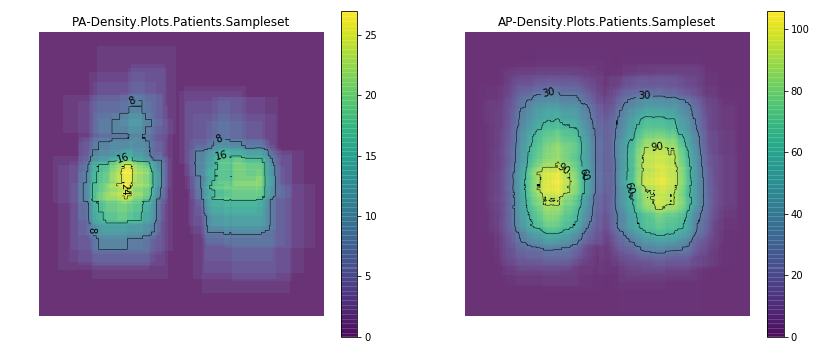

In [140]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)
_ = plot_density(sample_groups_to_bbox_sums['pa'], axes[0], 'PA-Density.Plots.Patients.Sampleset')
_ = plot_density(sample_groups_to_bbox_sums['ap'], axes[1], 'AP-Density.Plots.Patients.Sampleset')

figname = '{}{:%Y%m%dT%H%M%S}.png'.format(os.path.join(sample_visual,'Density.Plots.Position.Patients.1000Samples'), datetime.datetime.now())
plt.savefig(figname, figdpi = 600)



#### 5.4) By gender 

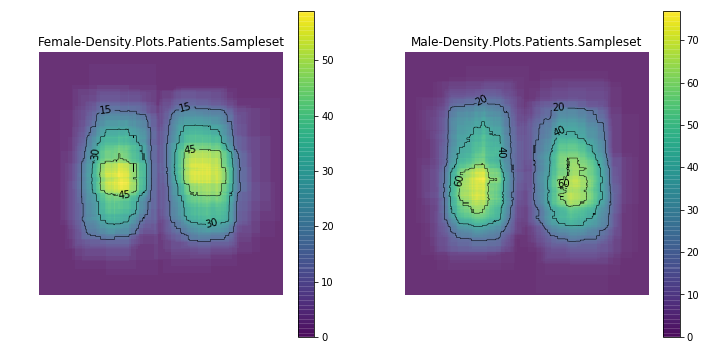

In [141]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

_ = plot_density(sample_groups_to_bbox_sums['f'], axes[0], 'Female-Density.Plots.Patients.Sampleset', n_countour_levels=3)
_ = plot_density(sample_groups_to_bbox_sums['m'], axes[1], 'Male-Density.Plots.Patients.Sampleset', n_countour_levels=3)

figname = '{}{:%Y%m%dT%H%M%S}.png'.format(os.path.join(sample_visual,'Density.Plots.Gender.Patients.1000Samples'), datetime.datetime.now())
plt.savefig(figname, figdpi = 600)


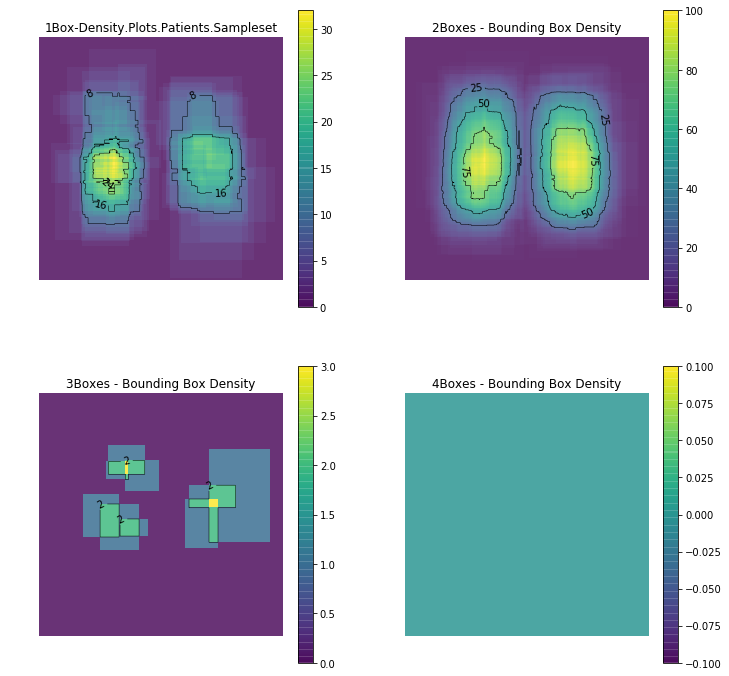

In [142]:
fig, axes = plt.subplots(2,2, figsize=(12, 12))

_ = plot_density(sample_groups_to_bbox_sums['bbox_1'], axes[0, 0], '1Box-Density.Plots.Patients.Sampleset', n_countour_levels=3)
_ = plot_density(sample_groups_to_bbox_sums['bbox_2'], axes[0, 1], '2Boxes - Bounding Box Density', n_countour_levels=3)
_ = plot_density(sample_groups_to_bbox_sums['bbox_3'], axes[1, 0], '3Boxes - Bounding Box Density', n_countour_levels=1)
_ = plot_density(sample_groups_to_bbox_sums['bbox_4'], axes[1, 1], '4Boxes - Bounding Box Density', n_countour_levels=1)


figname = '{}{:%Y%m%dT%H%M%S}.png'.format(os.path.join(sample_visual,'Density.Plots.Instances.Patients.1000Samples'), datetime.datetime.now())
plt.savefig(figname, figdpi = 600)


#### 5.3) By age

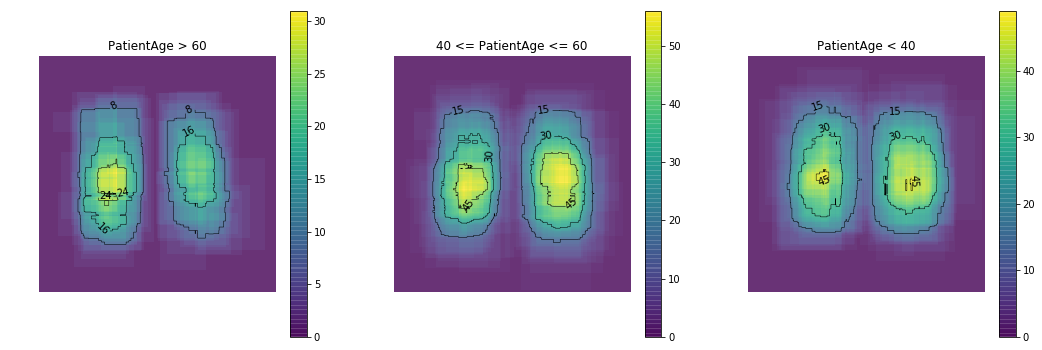

In [143]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

_ = plot_density(sample_groups_to_bbox_sums['age_above_60'], axes[0], 'PatientAge > 60', n_countour_levels=3)
_ = plot_density(sample_groups_to_bbox_sums['age_40_to_60'], axes[1], '40 <= PatientAge <= 60', n_countour_levels=3)
_ = plot_density(sample_groups_to_bbox_sums['age_below_40'], axes[2], 'PatientAge < 40', n_countour_levels=3)


figname = '{}{:%Y%m%dT%H%M%S}.png'.format(os.path.join(sample_visual,'Density.Plots.Age.Patients.1000Samples'), datetime.datetime.now())
plt.savefig(figname, figdpi = 600)

#### Number of positive (Target =1) and negative (Target =0) samples

In [150]:
# Count by colname
def plot_by_target(df,colname, save_plot_dir):
    import seaborn as sns, matplotlib.pyplot as plt
    df=df.drop_duplicates()
    number = df[colname].value_counts().values
    number = [str(x) for x in number.tolist()]
    number = ['n: ' + i for i in number]
    ax = sns.countplot(x=colname,  data=df)
    
    pos = range(len(number))
    for tick,label in zip(pos,ax.get_xticklabels()):
        ax.text(pos[tick], + 0.1, number[tick], horizontalalignment='center', size='small', color='w', weight='semibold')
    
    
    fig = ax.get_figure()
    
    #save plot
    n_images =df['image_path'].nunique()
    name= 'dcm_summary_by_label_'+str(n_images)+'samples'
    figname = '{}{:%Y%m%dT%H%M%S}.png'.format(os.path.join(save_plot_dir,name), datetime.datetime.now())
    fig.savefig(figname, figdpi = 600)


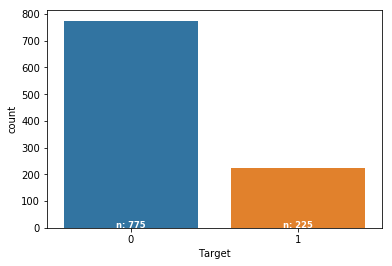

In [151]:
# Smple dataset: dataframe containing unique patientIDs
plot_by_target(df_sample_target_path,'Target',sample_visual)

### References
[Medical Imaging Data & Modalities](https://www.coursera.org/learn/datascimed/lecture/NGck4/medical-imaging-data-modalities)  
[Intro EDA with DICOM Metadata](https://www.kaggle.com/jtlowery/intro-eda-with-dicom-metadata)


####  Summary of files used in this notebook
#### You can find them in the /ocean_assets/meta_data/sample_meta

* New
  * df_dcm_1000sample.csv
  * df_dcm_merge_box_1000samples.csv
  * df_dcm_merge_target_path_1000samples.csv

* Previously generated files
  * df_target_path_box_1000samples.csv
  * df_target_path_1000sample.csv